# PCA (Principal Component Analysis)

---

### 1️⃣ One-line intuition

**PCA rotates your data to find the directions where it varies the most, and keeps only those directions.**
Result: **fewer features, less noise, most information preserved.**

---

### 2️⃣ Simple real-world analogy

Imagine you’re photographing a **3D object**.

* From some angles → it looks messy
* From the *best angle* → its structure is very clear

**PCA finds the best camera angles** (directions) where the data looks most informative.

---

### 3️⃣ What problem PCA solves

High-dimensional data causes problems:

* Too many features
* Correlated variables
* Noise
* Slower models
* Overfitting

**PCA helps by:**

* Reducing dimensions
* Removing correlation
* Keeping maximum variance (information)

---

### 4️⃣ Core idea (non-math)

Given many features:

* PCA finds a **new set of axes**
* These axes:

  * Are **perpendicular** to each other
  * Capture **maximum variance**
* First axis → most important
* Second axis → second most important
* And so on…

You keep only the **top K axes**.

---

### 5️⃣ Visual intuition (2D → 1D)

Original features:

```
height ↗
        •
      •
    •
  •
•——————→ weight
```

These are **correlated**.

PCA:

* Rotates axes
* Projects points onto the **main direction**
* Discards the less useful direction

Result:
**2 features → 1 powerful feature**

---

### 6️⃣ What “variance” really means

Variance = **spread of data**

Why maximize it?

* More spread → more information
* Less spread → mostly noise

PCA says:

> “Keep directions where data spreads the most.”

---

### 7️⃣ How PCA works (conceptually)

1. **Standardize data**
   (Important: PCA is scale-sensitive)

2. **Find correlations**

   * Which features move together?

3. **Compute principal components**

   * New axes that maximize variance

4. **Sort components by importance**

   * PC1 > PC2 > PC3 …

5. **Project data onto top K components**

---

### 8️⃣ What are “principal components”?

Each principal component is:

* A **weighted combination** of original features
* Example:

```
PC1 = 0.6*height + 0.4*weight + 0.2*age
```

They:

* Are **orthogonal** (uncorrelated)
* Capture decreasing variance

---

### 9️⃣ Explained variance ratio

Tells you **how much information you kept**.

Example:

```
PC1 → 70%
PC2 → 20%
PC3 → 5%
```

If you keep PC1 + PC2:
👉 **90% of data information retained**

---

### 🔟 When should you use PCA?

✅ Use PCA when:

* Features are highly correlated
* Dimensionality is high
* You want faster models
* You want visualization (2D / 3D)
* Noise reduction is needed

❌ Avoid PCA when:

* Interpretability is critical
* Features already small & meaningful
* Non-linear structure dominates

---

### 1️⃣1️⃣ PCA in ML pipeline

Common usage:

```
StandardScaler → PCA → Model
```

Often used before:

* Logistic Regression
* SVM
* KNN
* Clustering
* Visualization

---

### 1️⃣2️⃣ PCA vs Feature Selection

| PCA                  | Feature Selection  |
| -------------------- | ------------------ |
| Creates new features | Keeps original     |
| Removes correlation  | Doesn’t            |
| Less interpretable   | More interpretable |
| Linear combinations  | Actual columns     |

---

### 1️⃣3️⃣ Key limitations

* Linear only
* Loses feature meaning
* Sensitive to scaling
* Doesn’t consider target variable

---

### 1️⃣4️⃣ One-sentence summary

**PCA compresses your data by rotating it into the most informative directions and throwing away the rest.**


In [11]:
## PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Load dataset
data = load_breast_cancer()

X = data.data        # features
y = data.target     # labels (0 = malignant, 1 = benign)
feature_names = data.feature_names


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]], shape=(569, 30))

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [9]:
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]], shape=(569, 2))

In [ ]:
## what % of data explained by these 2 components

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance retained:", pca.explained_variance_ratio_.sum())


Explained variance ratio: [0.44272026 0.18971182]
Total variance retained: 0.6324320765155946


In [6]:
df_pca = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"]
)

df_pca["Target"] = y
df_pca["Diagnosis"] = df_pca["Target"].map({0: "Malignant", 1: "Benign"})


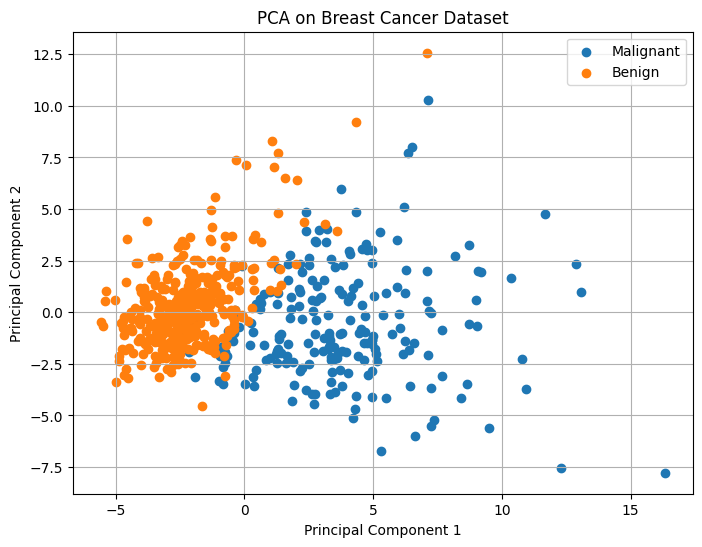

In [8]:
plt.figure(figsize=(8, 6))

for label in np.unique(y):
    plt.scatter(
        X_pca[y == label, 0],
        X_pca[y == label, 1],
        label="Malignant" if label == 0 else "Benign",
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Breast Cancer Dataset")
plt.legend()
plt.grid(True)
plt.show()
